## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [25]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [26]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [27]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [28]:
diabetes_data.replace(0, np.nan, inplace=True)  #ok, but just to be sure;
diabetes_data.head()   #ok, satisfied that worked. Well, hope so anyway.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


**<font color='teal'> Plot histograms of each column. </font>**

array([<Axes: title={'center': 'Pregnancies'}>,
       <Axes: title={'center': 'Glucose'}>,
       <Axes: title={'center': 'BloodPressure'}>,
       <Axes: title={'center': 'SkinThickness'}>,
       <Axes: title={'center': 'Insulin'}>,
       <Axes: title={'center': 'BMI'}>,
       <Axes: title={'center': 'DiabetesPedigreeFunction'}>,
       <Axes: title={'center': 'Age'}>,
       <Axes: title={'center': 'Outcome'}>], dtype=object)

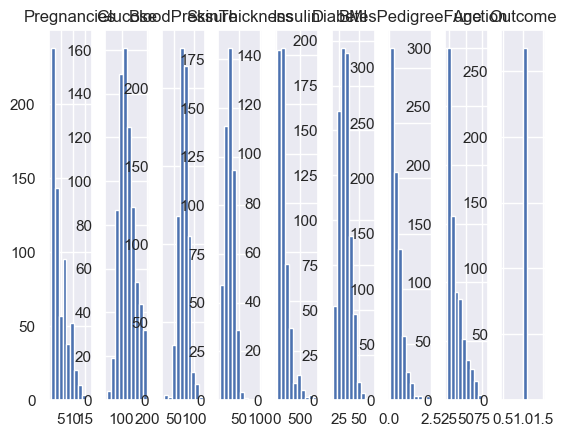

In [29]:
fig, axis = plt.subplots(1, 9)  #

diabetes_data.hist(ax=axis)   #this looks like crap--I'll fix it below

#### Replace the zeros with mean and median values.

In [30]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_33628\2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_33628\2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [31]:
print(diabetes_data.head())  #What a nightmare.  And by the way, the y column never got fixed.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    125.0  33.6   
1          1.0     85.0           66.0           29.0    125.0  26.6   
2          8.0    183.0           64.0           29.0    125.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      1.0  
1                     0.351   31      NaN  
2                     0.672   32      1.0  
3                     0.167   21      NaN  
4                     2.288   33      1.0  


In [32]:
#Applying another fix:
diabetes_data['Outcome'].replace(np.nan, 0, inplace=True) 

C:\Users\Owner\AppData\Local\Temp\ipykernel_33628\2687483007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Outcome'].replace(np.nan, 0, inplace=True)


In [33]:
print(diabetes_data.head())  #ok it's fixed, or at least seems so now

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    125.0  33.6   
1          1.0     85.0           66.0           29.0    125.0  26.6   
2          8.0    183.0           64.0           29.0    125.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50      1.0  
1                     0.351   31      0.0  
2                     0.672   32      1.0  
3                     0.167   21      0.0  
4                     2.288   33      1.0  


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

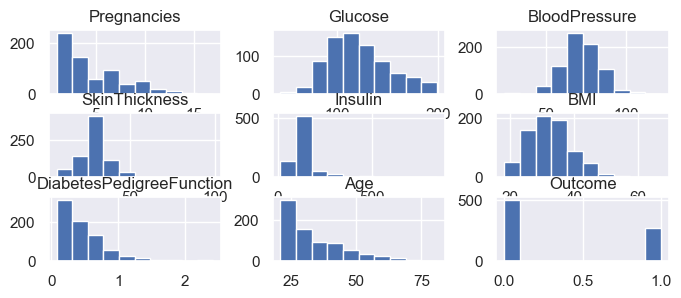

In [34]:
fig, axis = plt.subplots(3, 3,figsize=(8,3))  #

diabetes_data.hist(ax=axis)   #this looks somewhat better now

#### Plot the correlation matrix heatmap

Correlation between various features


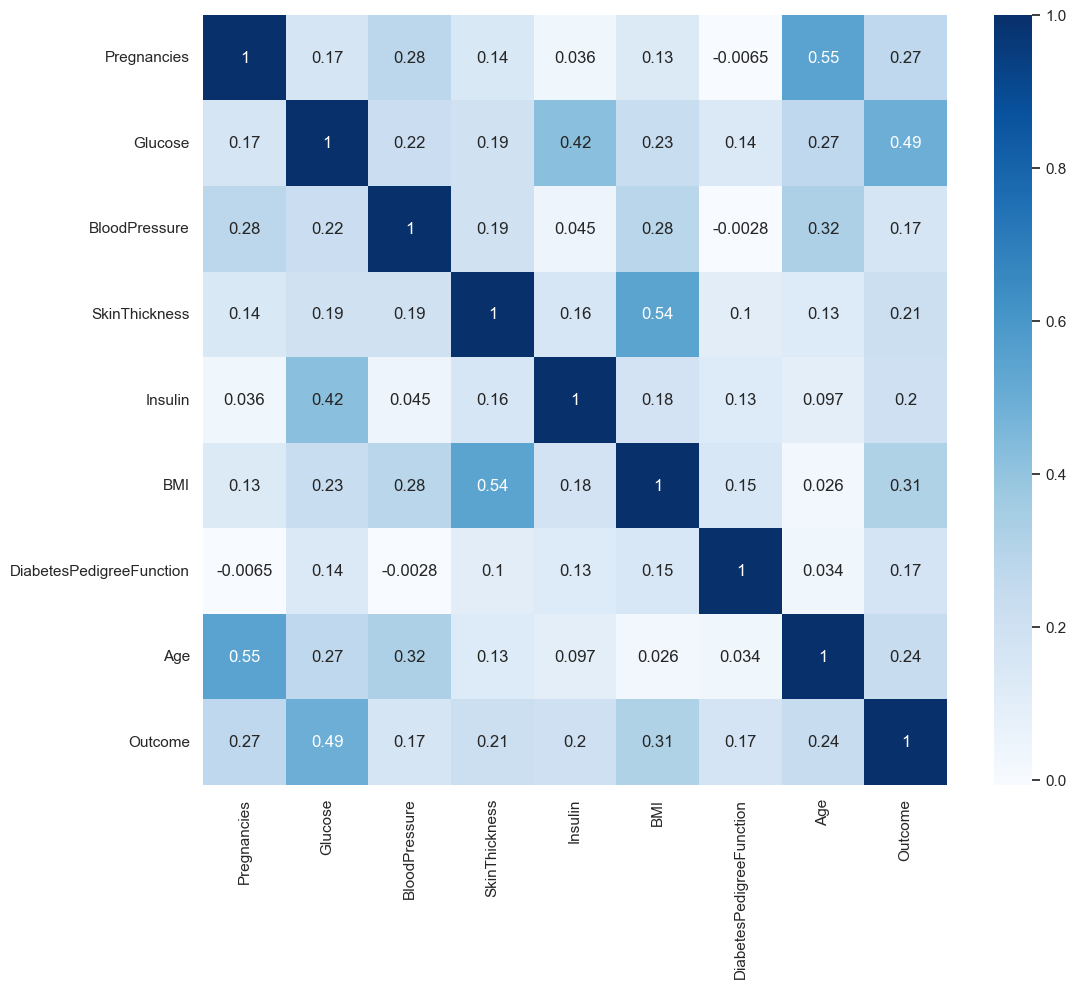

In [35]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [36]:
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [37]:
from sklearn.model_selection import train_test_split  #this is how I like to strip out just one column and keep all the rest
col_list = list(diabetes_data.columns) #so I can use the list without y as my x column list
col_list.remove('Outcome')
X=col_list
X_train, X_test, y_train, y_test = train_test_split(diabetes_data[X], y, test_size=0.30, random_state=10)  #that should do it

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [38]:
from sklearn.preprocessing import StandardScaler   #all of this is fairly straightforward*

scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)    #*famous last words

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the data.

In [39]:
# All of this was a mess as you'll see, had to clean it up and proceed further down...

In [40]:
#from sklearn.neighbors import KNeighborsClassifier

#when I run this I"m getting NaNs.  Will it ever end?
#test_scores = []
#train_scores = []

#for i in range(1,10):

#    knn = KNeighborsClassifier(i)
#    knn.fit(X_train_scaled,y_train)
    
#    train_scores.append(knn.score(X_train_scaled,y_train))
#    test_scores.append(knn.score(X_test_scaled,y_test))

In [41]:
#I'll create a temporary df to examine the scaled training data
df_temp = pd.DataFrame(data=X_train_scaled)
df_temp.head()  #something is clearly wrong with the scaled insulin values...let's check X_train first

,0,1,2,3,4,5,6,7
0,-0.735685,-1.066011,1.424369,0.118696,-0.195208,0.156252,-0.512806,0.748827
1,-0.113285,0.761181,1.017198,-0.215019,-0.456335,-0.525079,-0.821894,-0.522096
2,1.753915,-0.360779,-0.204316,-0.215019,-0.195208,-0.732441,-0.965935,0.579370
3,-1.046885,-0.745451,-0.041448,0.118696,-1.312830,0.911642,-0.152703,-1.030465
4,-1.046885,-1.643019,-1.995870,-1.216164,-0.707016,-1.784062,-0.419779,-0.945737


In [42]:
df_temp2 = pd.DataFrame(data=X_train)
df_temp2.head()   #So, what's the deal here?  I"ll look at the original df.
#print(diabetes_data['Insulin'].isna().sum())
print(df_temp2.isna().sum())     #oh great, so 'Pregnancies' never got fixed.  

Pregnancies                 70
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [43]:
#ok, so it was the dumbest thing ever to replace 0 pregnancies with NaN.  Let's fix it.
#grumbles and growls
diabetes_data['Pregnancies'].replace(np.nan, 0, inplace=True) 

C:\Users\Owner\AppData\Local\Temp\ipykernel_33628\760347233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Pregnancies'].replace(np.nan, 0, inplace=True)


In [44]:
#I heard ya the first time.  Now redo the train/test split and the scaling:
X_train, X_test, y_train, y_test = train_test_split(diabetes_data[X], y, test_size=0.30, random_state=10) 
from sklearn.preprocessing import StandardScaler   #all of this is fairly straightforward*

scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train) 

# Now at last we can proceed with 
# Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the data.


In [45]:
from sklearn.neighbors import KNeighborsClassifier

#when I run this I"m getting NaNs.  
test_scores = []
train_scores = []

for i in range(1,10): 

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [46]:
#works at last, NEVER REPLACE zero with NAN!!!!!!
#Huh? more errors?  OMG
for i in range(1,11):
    print(i, train_scores[i],test_scores[i])

1 0.8472998137802608 0.7359307359307359
2 0.8472998137802608 0.7445887445887446
3 0.819366852886406 0.7402597402597403
4 0.819366852886406 0.7316017316017316
5 0.8026070763500931 0.7316017316017316
6 0.8081936685288641 0.7272727272727273
7 0.7932960893854749 0.7142857142857143
8 0.8081936685288641 0.7142857142857143


IndexError: list index out of range

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [ ]:
#1-2 neighbors are at max

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [ ]:
# 2 neighbors

Plot the train and test model performance by number of neighbors.

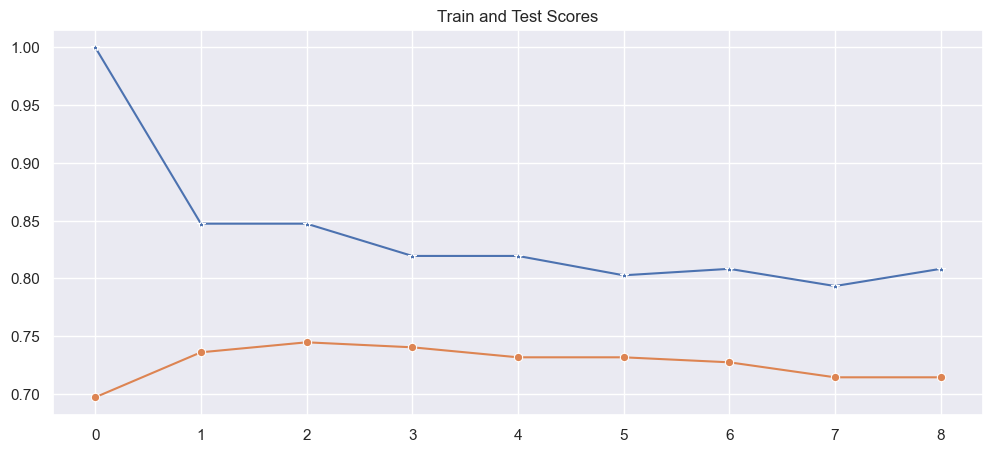

In [47]:
plt.figure(figsize=(12,5))    #this needed some modification, what was up with all that?
p = sns.lineplot(data=train_scores,marker='*').set(title = 'Train and Test Scores')
p = sns.lineplot(data=test_scores ,marker='o')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [48]:
knn = KNeighborsClassifier(2)  #2 nearest neighbors, as above
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
#Now score
print('training score:', knn.score(X_train_scaled,y_train))
print('test score:',knn.score(X_test_scaled,y_test))

training score: 0.8472998137802608
test score: 0.7359307359307359


In [50]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

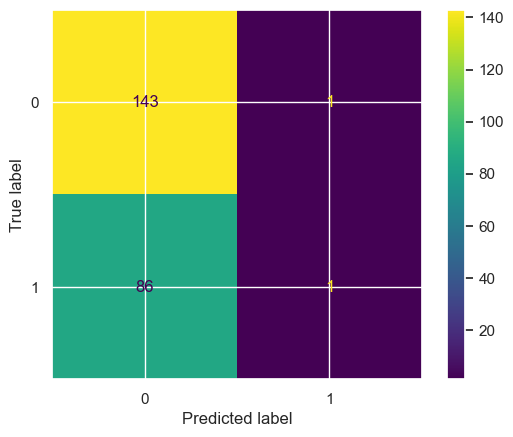

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=pl,)
disp.plot()
plt.show()

**<font color='teal'> Print the classification report </font>**

In [52]:
from sklearn.metrics import classification_report   #well, this performance looks pretty lousy!

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.99      0.77       144
         1.0       0.50      0.01      0.02        87

    accuracy                           0.62       231
   macro avg       0.56      0.50      0.39       231
weighted avg       0.58      0.62      0.49       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [53]:
from sklearn.model_selection import GridSearchCV   #bugs.  What else is new?
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)    #here's where I had to fix it.

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [54]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7690031152647975
Best Parameters: {'n_neighbors': 23}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

In [ ]:
#Nope, it's 23, see? Maybe that goes back to my random state in train/test split?

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [55]:
#Modify to use random trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

param_grid = {'n_estimators':np.arange(100,1000, step=50)}  #here I want the number of estimators to vary

clf = RandomForestClassifier(max_depth=2, n_estimators = 100, random_state=10)  #Just for init, we want to vary this with a grid search. Using 'stumps'.

clf_cv= GridSearchCV(clf,param_grid,cv=5)  #I'm letting it cross validate here as well
clf_cv.fit(X_train_scaled,y_train)





GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=10),
             param_grid={'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])})

In [56]:
#then print best score and params.
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.759761163032191
Best Parameters: {'n_estimators': 350}


In [57]:
#and there we have it.  Unfortunately, the 'best score' metric dropped!  Now, admittedly, I could run a finer grid 
#search say from 310-390 in steps of ten to narrow in, but...oh, why not:
param_grid = {'n_estimators':np.arange(310,390, step=10)}  #here I want the number of estimators to vary

clf = RandomForestClassifier(max_depth=2, n_estimators = 100, random_state=10)  #Just for init, we want to vary this with a grid search. Using 'stumps'.

clf_cv= GridSearchCV(clf,param_grid,cv=5)  #I'm letting it cross validate here as well
clf_cv.fit(X_train_scaled,y_train)
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.7616130148840429
Best Parameters: {'n_estimators': 340}


In [ ]:
#Ok, just barely better!  Now I'm satisfied and won't run from say 335 to 345 one step at a time...